<h1 align="center">UNIVERSIDADE ESTADUAL DE CAMPINAS</h1> 

<h1 align="center">INSTITUTE OF COMPUTING</h1> 

<h2 align="center">Machine Learninng</h2> 
<h2 align="center">MC886A/MO444A</h2> 


- Luis Bernal Chahuayo (RA 234923)
- Jarol Butron Soria (RA 234833)

# 1. Introduction
<p>Clustering allows us to be able to group a set of objects into subsets of objects called clusters, each cluster is made up of a collection of objects that are similar to each other, but that are different from the objects of other clusters. It can be used for the diagnosis of diseases through images, in the monitoring of social networks, marketing. Clustering is part of unsupervised learning, there are some clustering methods such as k-means, hierarchical clustering, K-medoids, DBSCAN, Hierarchical Clustering, etc.</p>

# 2. Clustering Methods
## 2.1 K-Means

The K-means algorithm is an iterative algorithm that attempts to divide the data set into K distinct non-overlapping predefined subgroups called clusters, where each data point belongs to a single group. Trying to make the intra-cluster data points as similar as possible while keeping the clusters as different as possible.

- args:
    - k : Number of clusters
    - x : Dataset X-axis
    - y : Dataset Y-axis
    - x_min: 
    - x_max:
    - y_min: 
    - y_max: 

- returns:
    - punto_x,
    - punto_y,
    - matriz_clusters,
    - distortion

In [2]:
def kmeans(k,x,y):
    # Find min and max values    
    x_min=np.min(x)
    x_max=np.max(x)
    y_min=np.min(y)
    y_max=np.max(y)
   
    # Select K Random Points
    punto_x=np.random.uniform(low=x_min,high=x_max,size=k)
    punto_y=np.random.uniform(low=y_min,high=y_max,size=k)
    
    # Setting a huge distortion
    # Used to stop algorithm
    old_distortion = np.inf

    for it in range(20):
        # Create distance matrix
        matriz_distancias = np.zeros((len(x),k))
        for k_i in range(k):
            # Euclidean distance
            x_h=(x-punto_x[k_i])**2
            y_h=(y-punto_y[k_i])**2
            dist= np.sqrt(x_h+y_h)
            matriz_distancias[:,k_i]=dist

        # Find the minimum distance. Creation of mask matrix
        min=np.argmin(matriz_distancias,axis=1)
        matriz_clusters=np.zeros(matriz_distancias.shape)
        i=0
        for min_i in min:
            matriz_clusters[i][min_i]=1
            i+=1

        # Column matrix transformation
        x_r=x.reshape(-1,1)
        y_r=y.reshape(-1,1)

        # Sum of cluster values
        matriz_clusters_x=x_r*matriz_clusters
        matriz_clusters_y=y_r*matriz_clusters

        total=matriz_clusters.sum(axis=0)

        total_x=matriz_clusters_x.sum(axis=0)
        total_y=matriz_clusters_y.sum(axis=0)

        # Update point with mean total_x
        punto_x=(total_x/ (total+0.0000000001) )
        punto_y=(total_y/ (total+0.0000000001) )

        # Cluster list
        clusters = np.argmax(matriz_clusters,axis=1)
        centroides_x = np.matmul(matriz_clusters,punto_x)
        centroides_y = np.matmul(matriz_clusters,punto_y)
        
        distortion = Distortion(x,y,centroides_x,centroides_y)
        
        # Distortion - Condition
        if ( abs( old_distortion - distortion ) <= 0.001 ): 
            break
        else: old_distortion = distortion


    print ( "\n \n DISTORTION =",distortion, "Clusters=", k)
    plt.scatter(x,y,marker="o",c=clusters)
    plt.scatter(punto_x,punto_y,marker="*",c="red")
    plt.show()

    return punto_x,punto_y,matriz_clusters,distortion


## 2.2 DBSCAN
The Density-Based Noisy Applications Spatial Clustering Algorithm (DBSCAN) is an algorithm used for density-based clustering. Being able to discover groups of different shapes and sizes from a large amount of data that contains noise and outliers. The DBSCAN algorithm uses two parameters: the minimum number of points (threshold) grouped for a region to be considered dense, and an average distance that will be used to locate the points in the vicinity of any point.

- args:
    - k : Number of clusters
    - x : Dataset X-axis
    - y : Dataset Y-axis
    - x_min: 
    - x_max:
    - y_min: 
    - y_max: 

- returns:
    - punto_x,
    - punto_y,
    - matriz_clusters,
    - distortion



In [3]:
def dbscan(x,y, radio, M ):
    marcas = np.zeros( x.shape )

    # Repeat until all points are visited

    while( True ):
        por_procesar = np.where( marcas == 0)
        if ( len ( por_procesar[0] ) == 0): 
            break

        # Choose a point not visited 
        p_index = por_procesar[0][0] 
        punto_x = x[p_index]
        punto_y = y[p_index]

        # Get Distances 
        distancias = np.sqrt ( ( x - punto_x )**2 + ( y - punto_y )**2 )

        # Select points that are neighboors from the choose point
        n_vecinos = len ( distancias[ distancias < radio ]  )

        # Classify 
        # 0 No worked 
        # 1 Core Point
        # 2 Border
        # 3 Outlier

        if  n_vecinos >= M:
            marcas[p_index] = 1
        elif n_vecinos > 0 : 
            marcas[p_index] = 2
        else: 
            marcas[p_index] = 3
    
    # -1 : No cluster
    clusters = -1 * np.ones ( marcas.shape )
    visitados = np.zeros ( marcas.shape  , dtype=bool)
    core_points = np.where(marcas == 1)[0]
    n_cluster = 0

    # Repeat until all core points have been visited 
    while ( True ):
        if ( len(core_points) == 0 ) : break
        if  len(  np.where ( ( ~ visitados ) & ( clusters != -1  ) & ( marcas == 1 ) )[0]  ) == 0:
            c_p_x = x[core_points[0]]
            c_p_y = y[core_points[0]]
            visitados[ core_points[0] ] = 1 
            distancias = np.sqrt ( ( x - c_p_x )**2 + ( y - c_p_y )**2 )
            clusters[ np.where(distancias < radio)  ] = n_cluster 
            core_points = core_points[ 1 : ]
            n_cluster += 1 
        else:
            core_points_nuevos = np.where ( ( ~ visitados ) & ( clusters != -1  ) & ( marcas == 1 ) )[0]      
            c_p_x = x[core_points_nuevos[0]]
            c_p_y = y[core_points_nuevos[0]]
            visitados[ core_points_nuevos[0] ] = 1 
            distancias = np.sqrt ( ( x - c_p_x )**2 + ( y - c_p_y )**2 )
            clusters[ np.where(distancias < radio)  ] = clusters[ core_points_nuevos[0] ]
            core_points = np.delete(core_points, np.where( core_points == core_points_nuevos[0] ))

    print ( clusters )
    
    print("\n \nBorders and Core Points")
    plt.scatter(x,y,c=marcas)
    plt.show()

    print("Final Clusters formed")
    plt.scatter(x,y,c=clusters,s=3)
    plt.show()

    return clusters 

# 3. Evaluation Metrics 
## 3.1 Distortion
The sum of all squared errors (SSE). The error is the difference between the coordinates of each data point and the coordinates of the centroid.

$$
SSE=\sum_{i=1}^{m} {(y_i - \hat{y_i})}^{2}
$$

In [4]:
def Distortion(x,y,centroides_x,centroides_y):
    distortion = ( ( x - centroides_x )**2 + ( y - centroides_y )**2 ).sum()
    return distortion

## 3.2 RMSSTD
Root mean squared error standard deviation (RMSSTD),is a frequently used measure of the differences between the values predicted by a model and the observed values.

$$
RMSSTD= \sqrt{\frac{{\sum_i}{\sum_{x{\in}c_i}}{{\parallel x-c_i\parallel}}^{2}}{p.{\sum_i (n_i - 1)}}}
$$


In [5]:
def RMSSTD(x,y,punto_x,punto_y,matriz_clusters,k):
    centroides_x = np.matmul(matriz_clusters,punto_x)
    centroides_y = np.matmul(matriz_clusters,punto_y)
    distortion = Distortion(x,y,centroides_x,centroides_y)
    number_attributes = 2 * ( len(x) - k )
    return np.sqrt(distortion/number_attributes)

# 4. Dataset 1: clusters.dat 
## 4.1 Load Datasets


In [6]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

df = pd.read_table("cluster.dat",header=None, sep="\s+")
datos = pd.DataFrame(df)
datos


0      1
0    1555.0  28.65
1    1490.0  27.55
2    1445.0  28.35
3    1415.0  28.80
4    1375.0  28.05
..      ...    ...
568  3420.0  27.95
569  3465.0  26.85
570  3525.0  26.00
571  3570.0  26.15
572  3440.0  25.60

[573 rows x 2 columns]

In [7]:
#Transforming the dataset to a numpy array
datos=datos.to_numpy()
datos

array([[1555.  ,   28.65],
       [1490.  ,   27.55],
       [1445.  ,   28.35],
       ...,
       [3525.  ,   26.  ],
       [3570.  ,   26.15],
       [3440.  ,   25.6 ]])

## 4.2 Split Dataset (Train/test)


In [8]:
#Shuffle data
np.random.shuffle(datos)
datos

array([[1725.  ,    3.05],
       [ 745.  ,   21.95],
       [1040.  ,   10.55],
       ...,
       [1640.  ,    8.7 ],
       [ 560.  ,   20.75],
       [1635.  ,   10.85]])

In [9]:
#Split data in training/test sets (90/10)
datos_train = datos[:int(0.9*len(datos))]
datos_test = datos[int(0.9*len(datos)):]

x_train = datos_train[:,0]
y_train = datos_train[:,1]

x_test = datos_test[:,0]
y_test = datos_test[:,1]


## 4.3 Pre-processing
- Normalization (Min Max Scaler)
$$
    x_{scaled} = \frac{( x - x_{min} ) }{ (x_{max}-x_{min}) }
$$
$$
    y_{scaled} = \frac{( y - y_{min} ) }{ (y_{max}-y_{min}) } 
$$

In [10]:
def norm(x,y,x_max,x_min,y_max,y_min):
    x=(x-x_min)/(x_max-x_min) 
    y=(y-y_min)/(y_max-y_min)
    return x,y

# It's important to save original parameters

x_max_train = x_train.max()
x_min_train= x_train.min()
y_max_train = y_train.max()
y_min_train = y_train.min()

x_max_test = x_test.max()
x_min_test = x_test.min()
y_max_test = y_test.max()
y_min_test = y_test.min()

x_n_train, y_n_train = norm(x_train,y_train,x_max_train,x_min_train,y_max_train,y_min_train)
x_n_test, y_n_test = norm(x_test,y_test,x_max_test,x_min_test,y_max_test,y_min_test)

## 4.4 K-means Clustering
### 4.4.1 Choosing the best K: Elbow Method
The elbow method allows us to determine the optimal number of clusters in clusters of k-means. This method plots the value of the cost function produced by different values of k. If the k increases, the average distortion will decrease, each group will have fewer constituent instances, and the instances will be closer to their respective centroids.


 
 DISTORTION = 86.75614411445846 Clusters= 1


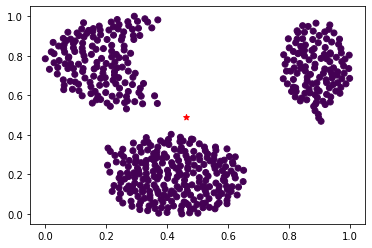


 
 DISTORTION = 44.92258391820427 Clusters= 2


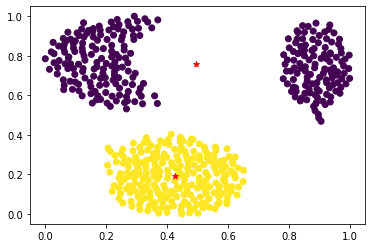


 
 DISTORTION = 11.307366334523437 Clusters= 3


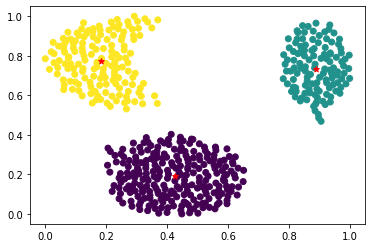


 
 DISTORTION = 10.134798087526363 Clusters= 4


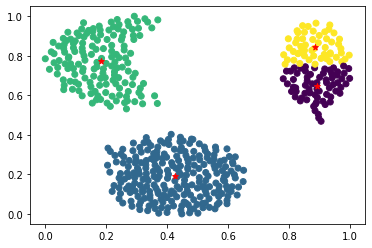


 
 DISTORTION = 7.236162421327301 Clusters= 5


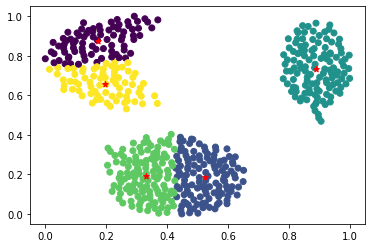


 
 DISTORTION = 6.067143068832069 Clusters= 6


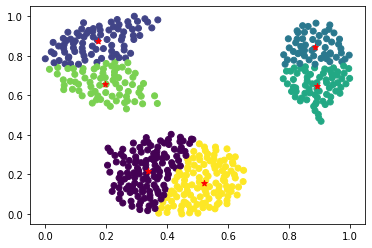


 
 DISTORTION = 5.34537670841671 Clusters= 7


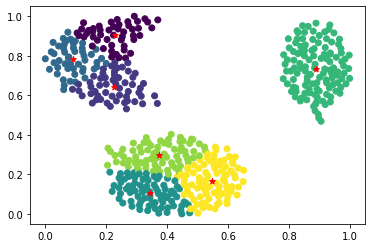


 
 DISTORTION = 5.756491149159357 Clusters= 8


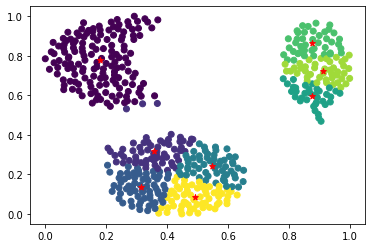


 
 DISTORTION = 4.269814218989986 Clusters= 9


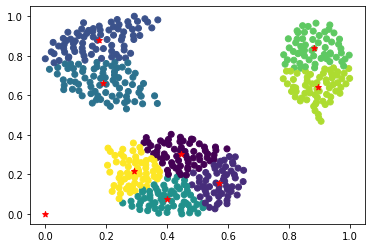


 
 DISTORTION = 3.906630729858172 Clusters= 10


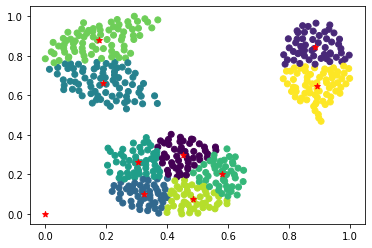


 
 Distortion


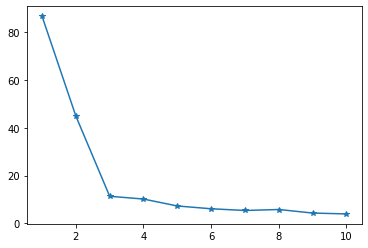

Root Mean Squared Standard Deviation


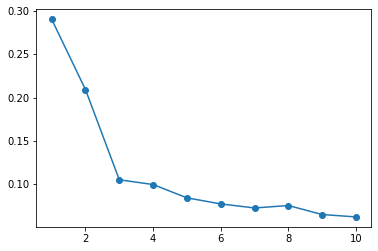

In [11]:
def elbow_method(k_max, x_n_train , y_n_train ):
    list_distortions = []
    list_rmmstds = []
    for k in range(1,k_max+1):
        centroide_x , centroide_y , matriz_clusters , distortion = kmeans(k,x_n_train,y_n_train)
        rmmstd = RMSSTD(x_n_train,y_n_train,centroide_x,centroide_y, matriz_clusters, k)
        list_distortions.append(distortion)
        list_rmmstds.append(rmmstd)
    
    print("\n \n Distortion")
    plt.plot(range(1,k_max+1),list_distortions,marker="*")
    plt.show()

    print("Root Mean Squared Standard Deviation")
    plt.plot(range(1,k_max+1),list_rmmstds,marker="o")
    plt.show()


# Execute with until 10 Clusters 
elbow_method(10,x_n_train,y_n_train)

Observing the last graphic ( Elbow Method ), Disttortion and RMSSD.
We choose **k=3**


 
 DISTORTION = 11.307366334523437 Clusters= 3


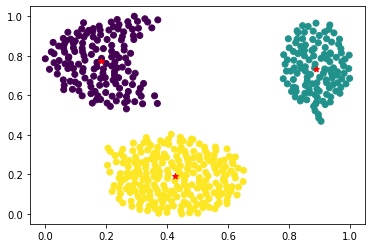

In [12]:
# k = 3 
results = kmeans(3,x_n_train,y_n_train)

Comentario discusión de los resultados obtenidos

## 4.5 DBSCAN Clustering

[0. 1. 0. 0. 0. 0. 2. 0. 0. 0. 2. 0. 1. 0. 0. 2. 0. 1. 0. 1. 2. 1. 0. 0.
 2. 0. 2. 0. 2. 1. 1. 2. 0. 1. 0. 0. 1. 2. 1. 1. 0. 0. 2. 1. 2. 2. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 2. 2. 0. 0. 0. 0. 0. 0. 2. 2. 1.
 0. 1. 2. 0. 2. 0. 0. 2. 2. 2. 0. 0. 2. 1. 0. 2. 2. 2. 1. 1. 1. 1. 2. 0.
 0. 0. 2. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 2. 0. 0. 0. 0. 1. 1. 1. 2. 0. 0.
 0. 2. 0. 0. 2. 0. 2. 0. 0. 2. 1. 1. 0. 1. 2. 2. 2. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 0. 0. 2. 1. 1. 0. 0. 0. 2. 0. 1. 0. 0. 1. 2. 0. 0. 0. 0. 0. 1.
 2. 0. 0. 1. 1. 2. 0. 2. 0. 1. 1. 1. 1. 0. 2. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 0. 2. 2. 1. 0. 0. 2. 2. 1. 2. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 2. 2.
 1. 0. 0. 2. 1. 1. 1. 1. 1. 2. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 2. 0.
 1. 1. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 0. 0. 1. 2. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 2. 1. 2. 0. 0. 0. 1. 0. 0. 2. 2. 0. 1. 2. 2. 1. 0. 2. 0. 0. 0. 0.
 1. 0. 2. 0. 2. 1. 0. 1. 0. 2. 0. 0. 0. 2. 0. 2. 0. 2. 1. 1. 0. 0. 0. 1.
 1. 1. 0. 2. 2. 1. 2. 1. 0. 2. 2. 1. 0. 2. 0. 2. 0.

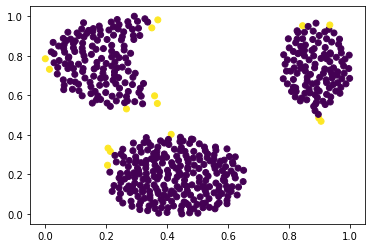

Final Clusters formed


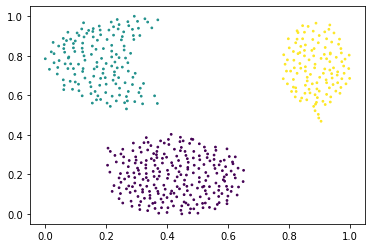

In [13]:
results_dbscan = dbscan(x_n_train, y_n_train, 0.07 , 9 )

# 5. Dataset 2: Vehicles Silohuetes
This dataset comes from the Turing Institute, Glasgow, Scotland. It contains 3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects.


## 5.1 Description 
The features were extracted from the silhouettes by the HIPS (Hierarchical Image Processing System) extension BINATTS, which extracts a combination of scale independent features utilising both classical moments based measures such as scaled variance, skewness and kurtosis about the major/minor axes and heuristic measures such as hollows, circularity, rectangularity and compactness. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars. The images were acquired by a camera looking downwards at the model vehicle from a fixed angle of elevation (34.2 degrees to the horizontal). The vehicles were placed on a diffuse backlit surface (lightbox). The vehicles were painted matte black to minimise highlights. The images were captured using a CRS4000 framestore connected to a vax 750. All images were captured with a spatial resolution of 128x128 pixels quantised to 64 greylevels. These images were thresholded to produce binary vehicle silhouettes, negated (to comply with the processing requirements of BINATTS) and thereafter subjected to shrink-expand-expand-shrink HIPS modules to remove "salt and pepper" image noise. The vehicles were rotated and their angle of orientation was measured using a radial graticule beneath the vehicle. 0 and 180 degrees corresponded to "head on" and "rear" views respectively while 90 and 270 corresponded to profiles in opposite directions. Two sets of 60 images, each set covering a full 360 degree rotation, were captured for each vehicle. The vehicle was rotated by a fixed angle between  images. These datasets are known as e2 and e3 respectively. A further two sets of images, e4 and e5, were captured with the camera  at elevations of 37.5 degs and 30.8 degs respectively. These sets also contain 60 images per vehicle apart from e4.van which contains only 46 owing to the difficulty of containing the van in the image at some orientations.
 - NUMBER OF EXAMPLES 946
 - NUMBER OF ATTRIBUTES 16


## 5.1  Attributes 
- COMPACTNESS	(average perim)**2/area
- CIRCULARITY	(average radius)**2/area
- DISTANCE CIRCULARITY	area/(av.distance from border)**2
- RADIUS RATIO	(max.rad-min.rad)/av.radius
- PR.AXIS ASPECT RATIO	(minor axis)/(major axis)
- MAX.LENGTH ASPECT RATIO	(length perp. max length)/(max length)
- SCATTER RATIO	(inertia about minor axis)/(inertia about major axis)
- ELONGATEDNESS		area/(shrink width)**2
- PR.AXIS RECTANGULARITY	area/(pr.axis length*pr.axis width)
- MAX.LENGTH RECTANGULARITY area/(max.length*length perp. to this)
- SCALED VARIANCE 	(2nd order moment about minor axis)/area 
ALONG MAJOR AXIS
- SCALED VARIANCE 	(2nd order moment about major axis)/area
	ALONG MINOR AXIS 
- SCALED RADIUS OF GYRATION	(mavar+mivar)/area
- SKEWNESS ABOUT 	(3rd order moment about major axis)/sigma_min**3
	MAJOR AXIS
- SKEWNESS ABOUT 	(3rd order moment about minor axis)/sigma_maj**3
	MINOR AXIS
- KURTOSIS ABOUT 	(4th order moment about major axis)/sigma_min**4
	MINOR AXIS  
- KURTOSIS ABOUT 	(4th order moment about minor axis)/sigma_maj**4
	MAJOR AXIS
- HOLLOWS RATIO	(area of hollows)/(area of bounding polygon)


## 5.1 Loading Dataset 

In [14]:
d = pd.read_table("temp/merge-data",delimiter=" ",header=None)

# Clean data 
del d[19] 
datos = pd.DataFrame(d).dropna()
datos = datos.to_numpy()
print("Filas, columnas",datos.shape)

colores = datos[ : , 18 ]
datos = datos[ : , : 18 ]

Filas, columnas (846, 19)


## 5.2 Pre-processing ( Dimensionality Reduction )

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
datos_pca = pca.fit_transform( datos  )

## 5.2 Split Dataset Train/Test 

In [16]:
# Shuffe data
np.random.shuffle(datos_pca)


## 5.3 Pre-processing ( Normalization )


In [17]:
datos_train = datos_pca[:int(0.9*len(datos))]
datos_test = datos_pca[int(0.9*len(datos)):]

x_train = datos_train[:,0]
y_train = datos_train[:,1]

x_test = datos_test[:,0]
y_test = datos_test[:,1]

x_max_train = x_train.max()
x_min_train= x_train.min()
y_max_train = y_train.max()
y_min_train = y_train.min()

x_max_test = x_test.max()
x_min_test = x_test.min()
y_max_test = y_test.max()
y_min_test = y_test.min()

x_n_train, y_n_train = norm(x_train,y_train,x_max_train,x_min_train,y_max_train,y_min_train)
x_n_test, y_n_test = norm(x_test,y_test,x_max_test,x_min_test,y_max_test,y_min_test)

## 5.4 KMEANS 
Choose the best k 


 
 DISTORTION = 42.83118051636744 Clusters= 1


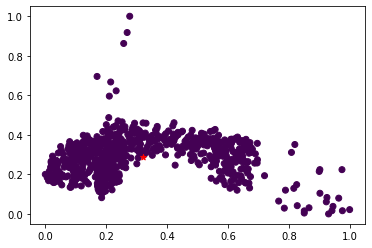


 
 DISTORTION = 15.06254581363226 Clusters= 2


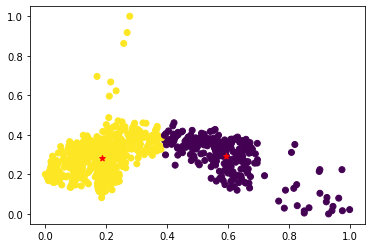


 
 DISTORTION = 13.401811469272117 Clusters= 3


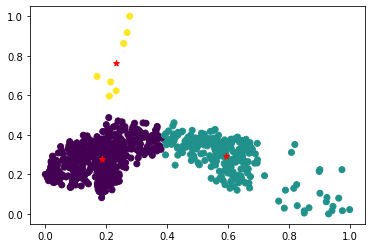


 
 DISTORTION = 7.711403951346686 Clusters= 4


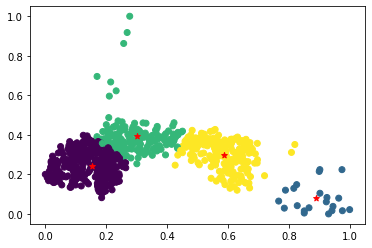


 
 DISTORTION = 6.666034796498483 Clusters= 5


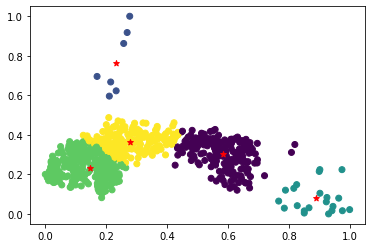


 
 DISTORTION = 7.052423819450812 Clusters= 6


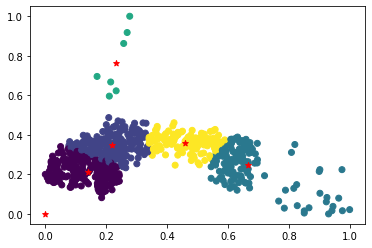


 
 DISTORTION = 5.975872924931769 Clusters= 7


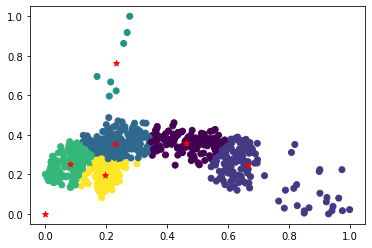


 
 DISTORTION = 5.106148957898164 Clusters= 8


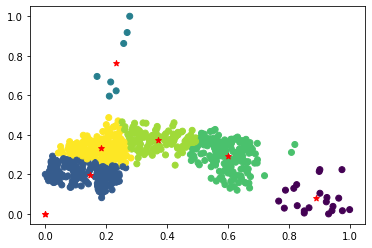


 
 DISTORTION = 3.8579221874244345 Clusters= 9


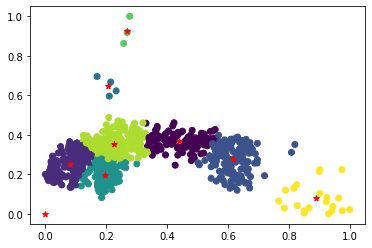


 
 DISTORTION = 3.858756092651533 Clusters= 10


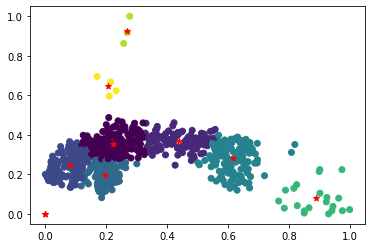


 
 Distortion


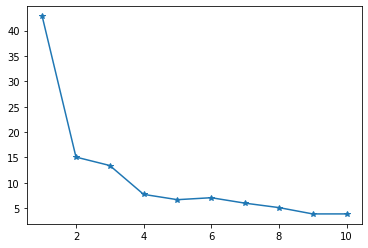

Root Mean Squared Standard Deviation


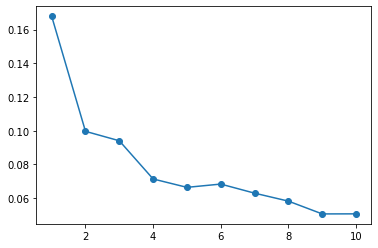

In [18]:
elbow_method(10,x_n_train,y_n_train)

By observation we could choose $k=3$ 


 
 DISTORTION = 13.401811469272117 Clusters= 3


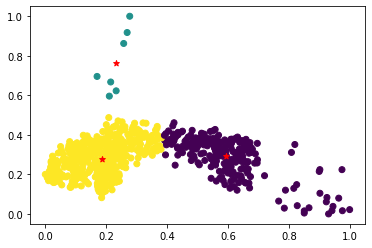

In [19]:
results = kmeans(3,x_n_train,y_n_train)

## 5.5 DBSCAN


[ 0.  0.  0.  0.  0.  1.  1.  0. -1.  0.  0.  0.  0.  0.  1.  0.  1.  0.
  0. -1.  0.  1.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0.  1.  1.
  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  1. -1.
  0.  0.  0.  0.  0.  0.  1.  1.  1.  0. -1.  0.  0.  1.  0.  0.  0.  0.
  0.  1.  1.  1.  1. -1.  0.  0.  2.  0. -1.  3.  0.  0.  0.  0.  0.  0.
  0. -1.  0.  0.  0.  0.  0.  0. -1.  0.  0.  1.  0.  0. -1.  0. -1.  0.
  0.  1.  0.  0. -1.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.  1.  0.
  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.
  1.  1.  1.  1.  0.  0. -1.  0.  0.  0.  0.  1. -1.  0.  0.  0.  2.  0.
  0.  0.  0.  0.  1.  0.  1.  1. -1.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0. -1.  0.  1. -1.  0.  0. -1.  1.  0.  0.  2.  1.  0.  0.
  0.  0.  1. -1.  0.  0.  1.  0.  0.  0.  1.  0.  0. -1.  0.  0.  1. -1.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0

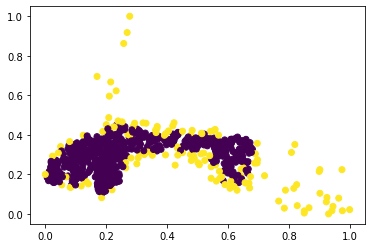

Final Clusters formed


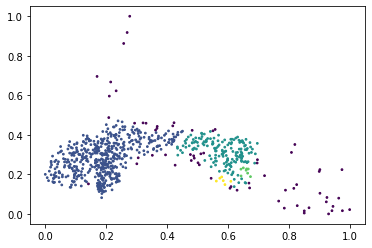

In [20]:
results_dbscan = dbscan(x_n_train, y_n_train, 0.026 , 6 )


## 6. Conclusions

## 7. Bibliography
- Turing Institute Research Memorandum TIRM-87-018 "Vehicle
	 Recognition Using Rule Based Methods" by Siebert,JP (March 1987)
